<a href="https://colab.research.google.com/github/cesarcalafrioli/MACHINE_LEARNING/blob/main/ML_REDUCAO_DIMENSIONALIDADE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Redução da Dimensionalidade**

A Redução da Dimensionalidade é uma técnica de Machine Learning (ML) que visa reduzir as colunas do conjunto de dados, enquanto retem a maioria das informações valiosas. Os conjuntos de dados com muitas colunas tornam-se difíceis de processar e visualizar.

Essa técnica também pode melhorar a acurácia dos modelos de Machine Learning, enquanto reduz os recursos computacionais e tempo necessário para treiná-los.

Várias técnicas são utilizadas para a tal redução, incluindo Principal Component Analysis (PCA), t-Distributed Stochastic Neighbor EMbedding (t-SNE), and Uniform Manifold Approximation and Projection (UMAP).

# **Exemplos**

## **Exemplo 1 (Palmer Penguins)**

Para este exemplo, será utilizado o conjunto de dados Palmer Penguins, disponível gratuitamente. É uma alternativa ao conjunto de dados Iris, que é considerado obsoleto e inadequado por alguns pesquisadores.

### **Etapa 1. Importando as bibliotecas nessárias**

Além das bibliotecas, também são importadas as classes PCA, umap-learn, e t-SNE, localizadas no scikit-learn.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# Optional
mpl.rcParams['figure.dpi'] = 300 # high resolution plots
plt.style.use('seaborn-v0_8-muted') # Matplotlib style sheet

### **Etapa 2. Carregando o conjunto de dados**

É criado um dataframe pandas baseado no conjunto de dados Palmer Penguins.

In [2]:
df = sns.load_dataset('penguins').dropna(thresh = 6)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


### **Etapa 3. Visualizando os conjuntos de dados**

O objetivo é aplicar uma análise exploratória dos dados e extrair alguma visão útil.

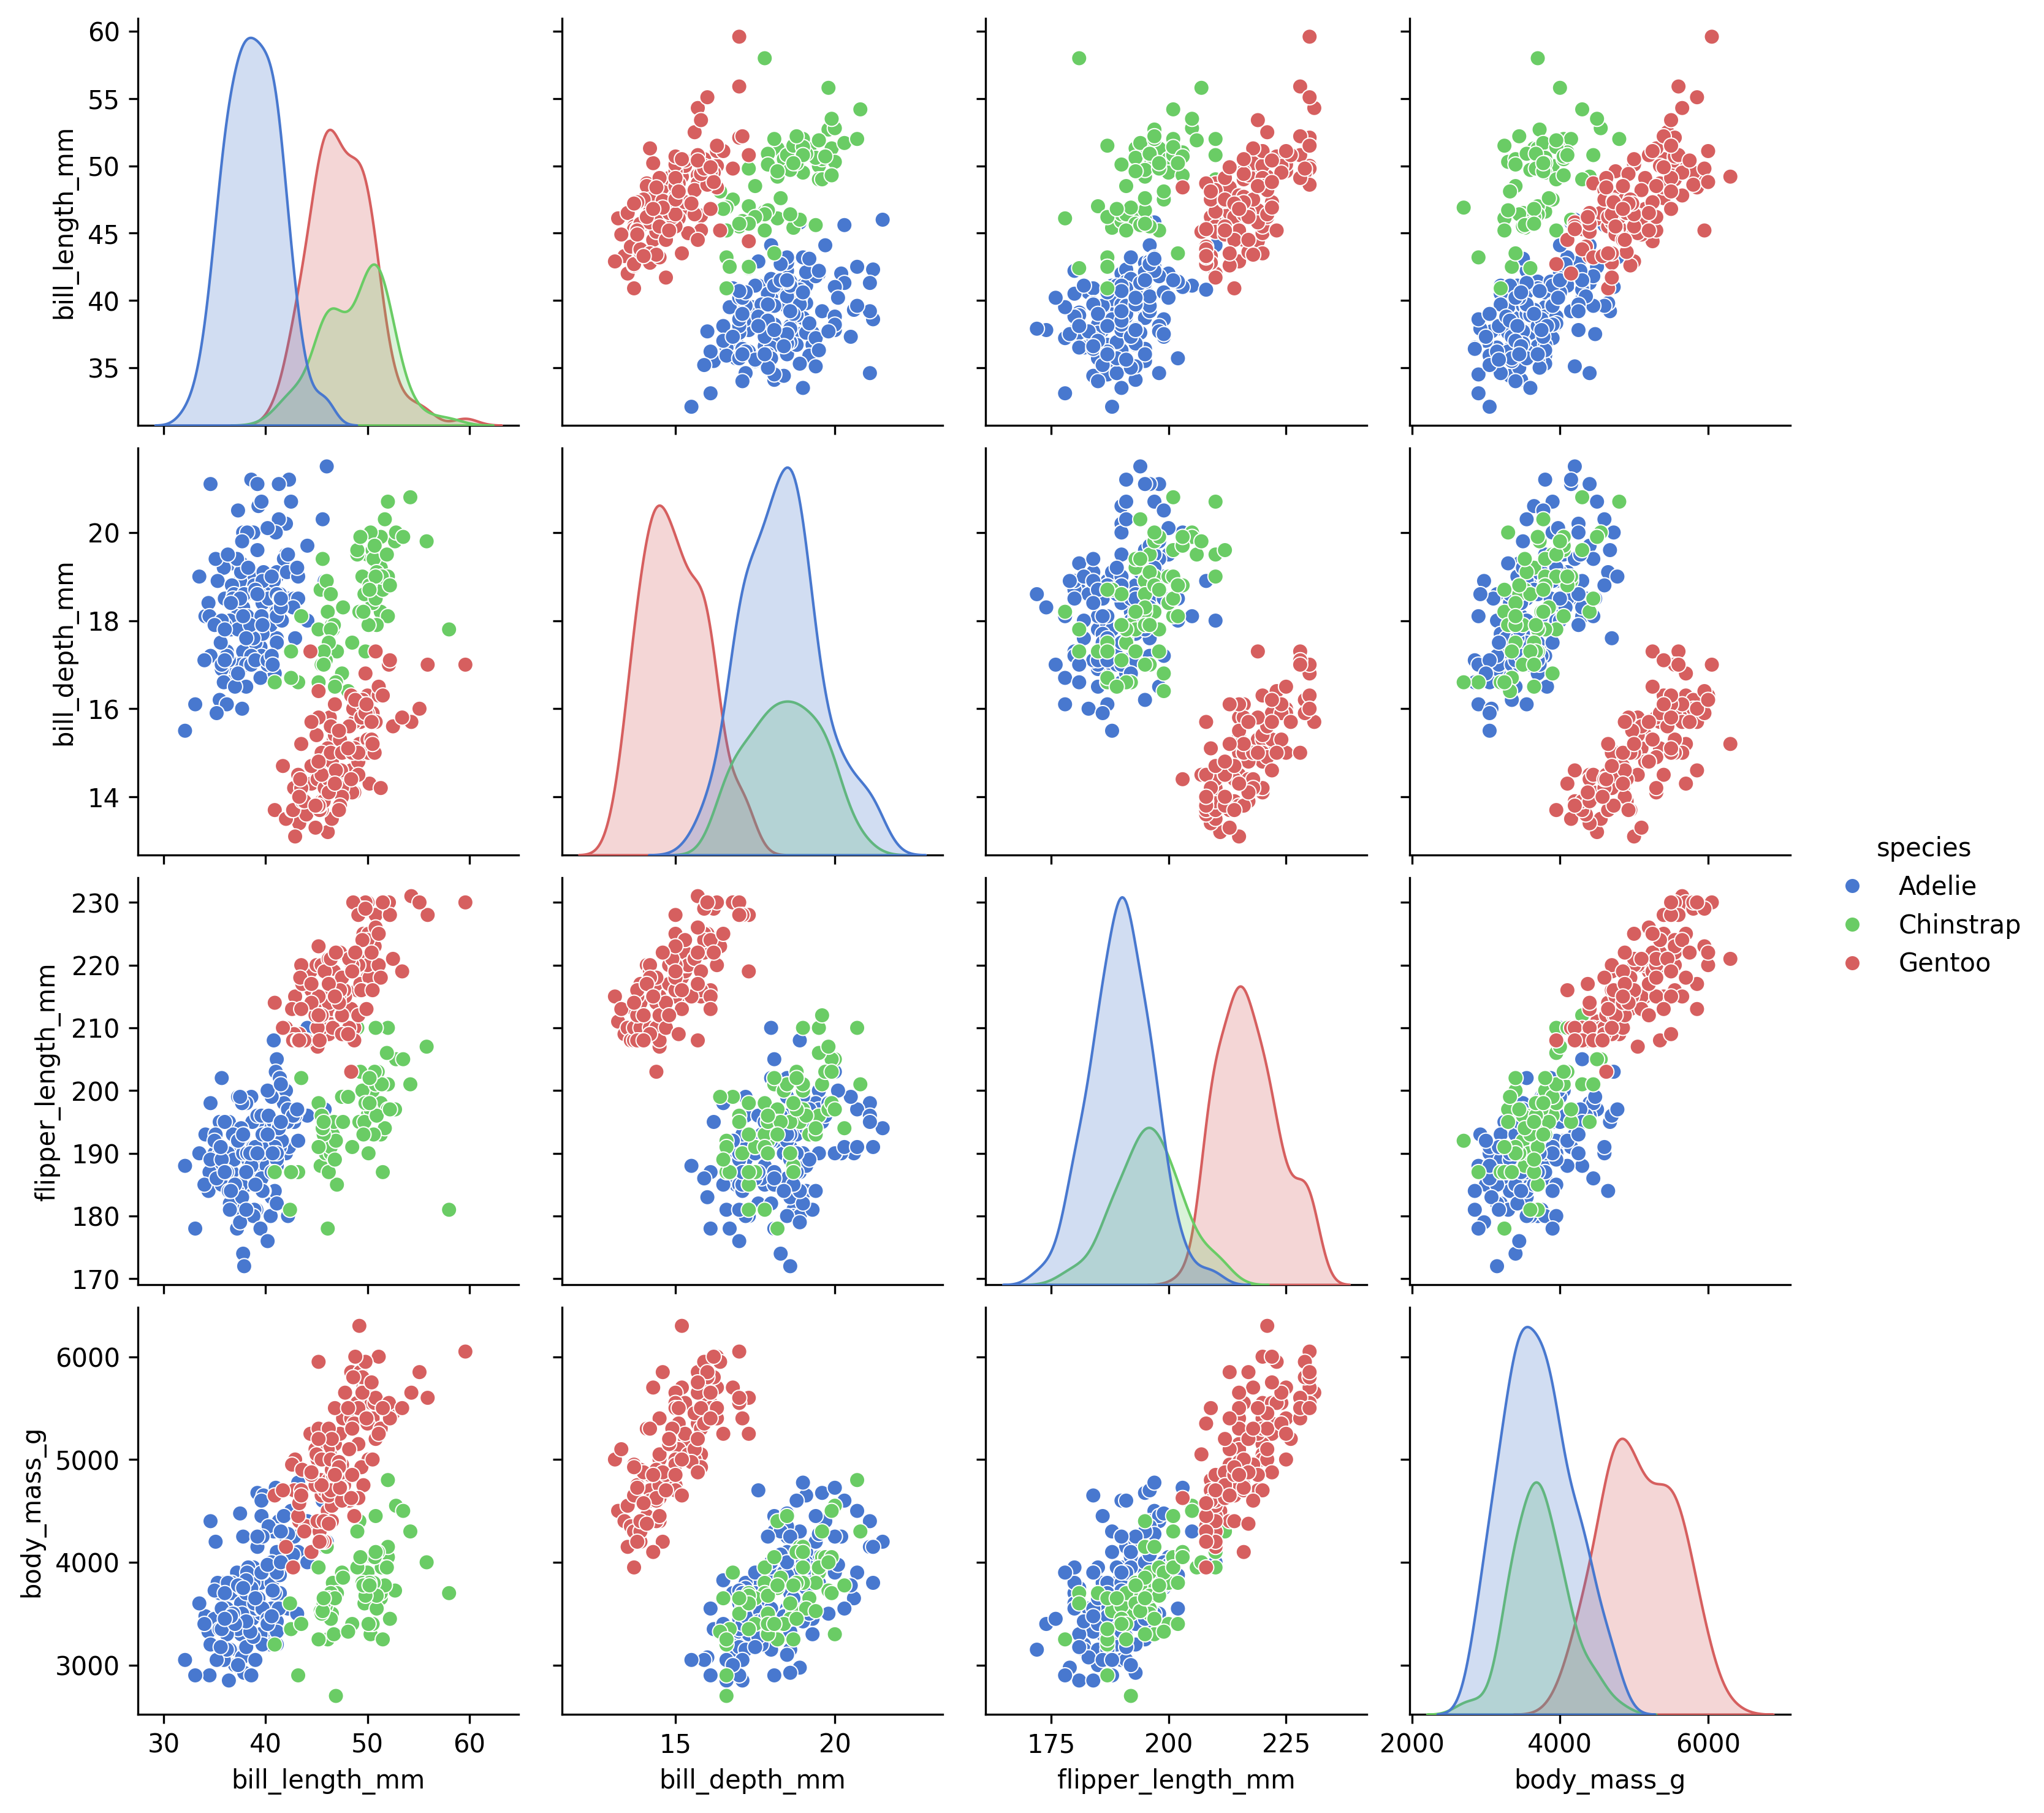

In [3]:
sns.pairplot(df, hue = 'species')
plt.show()

### **Etapa 4. Principal Component Analysis (PCA)**

PCA é uma técnica amplamente utilizada para redução da dimensionalidade na ML e análise de dados. Transforam os dados originais de alta dimensionalidade em um espaço de dimensão baixa, enquanto preserva a maioria da variância.

No PCA, aplica-se uma transformação ortogonal linear a um sistema diferente de coordenações, onde o primeiro componente principal explica a maioria da variância dos dados.

PCA ajuda a reduzir de maneira eficaz a dimensionalidade, resultando em um conjunto de dados que é mais fácil de visualizar e interpretar.

In [4]:
cols_num = ['bill_length_mm', 'bill_depth_mm',
            'flipper_length_mm', 'body_mass_g']
cols_cat = ['species', 'island', 'sex']

scaler = StandardScaler()

X = df[cols_num]
X = scaler.fit_transform(X)

y = df['species'].astype('category').cat.codes

Após carregar o conjunto de dados no dataframe pandas, foram criados as variáveis X e y, ou seja, as características e rótulo de classe. Além disso, a classe foi convertida em um tipo de dados categórico ,que inclui ambas as representações texto e numérico das variáveis categóricas.

Também é necessário aplicar a escala, pois PCA pressupoe que os dados sejam normalmente distribuídos, sendo também sensível à variância de cada variável. Foi criado o modelo PCA com dois componentes principais. Depois, foi exibido a lista para checar a variância explicada de cada componente principal.

No resultado abaixo, os dois componentes explicam quase 90% da variancia total, resultando em uma representação precisa do conjunto de dados original.

In [6]:
pca = PCA(n_components = 2)
components = pca.fit_transform(X)
explained_var = pca.explained_variance_ratio_

print(f'''The explained variance of PC1 is {explained_var[0]:.2%}
The explained variance of PC2 is {explained_var[1]:.2%}
The total explained variance is {explained_var.sum():.2%}''')

The explained variance of PC1 is 68.84%
The explained variance of PC2 is 19.31%
The total explained variance is 88.16%


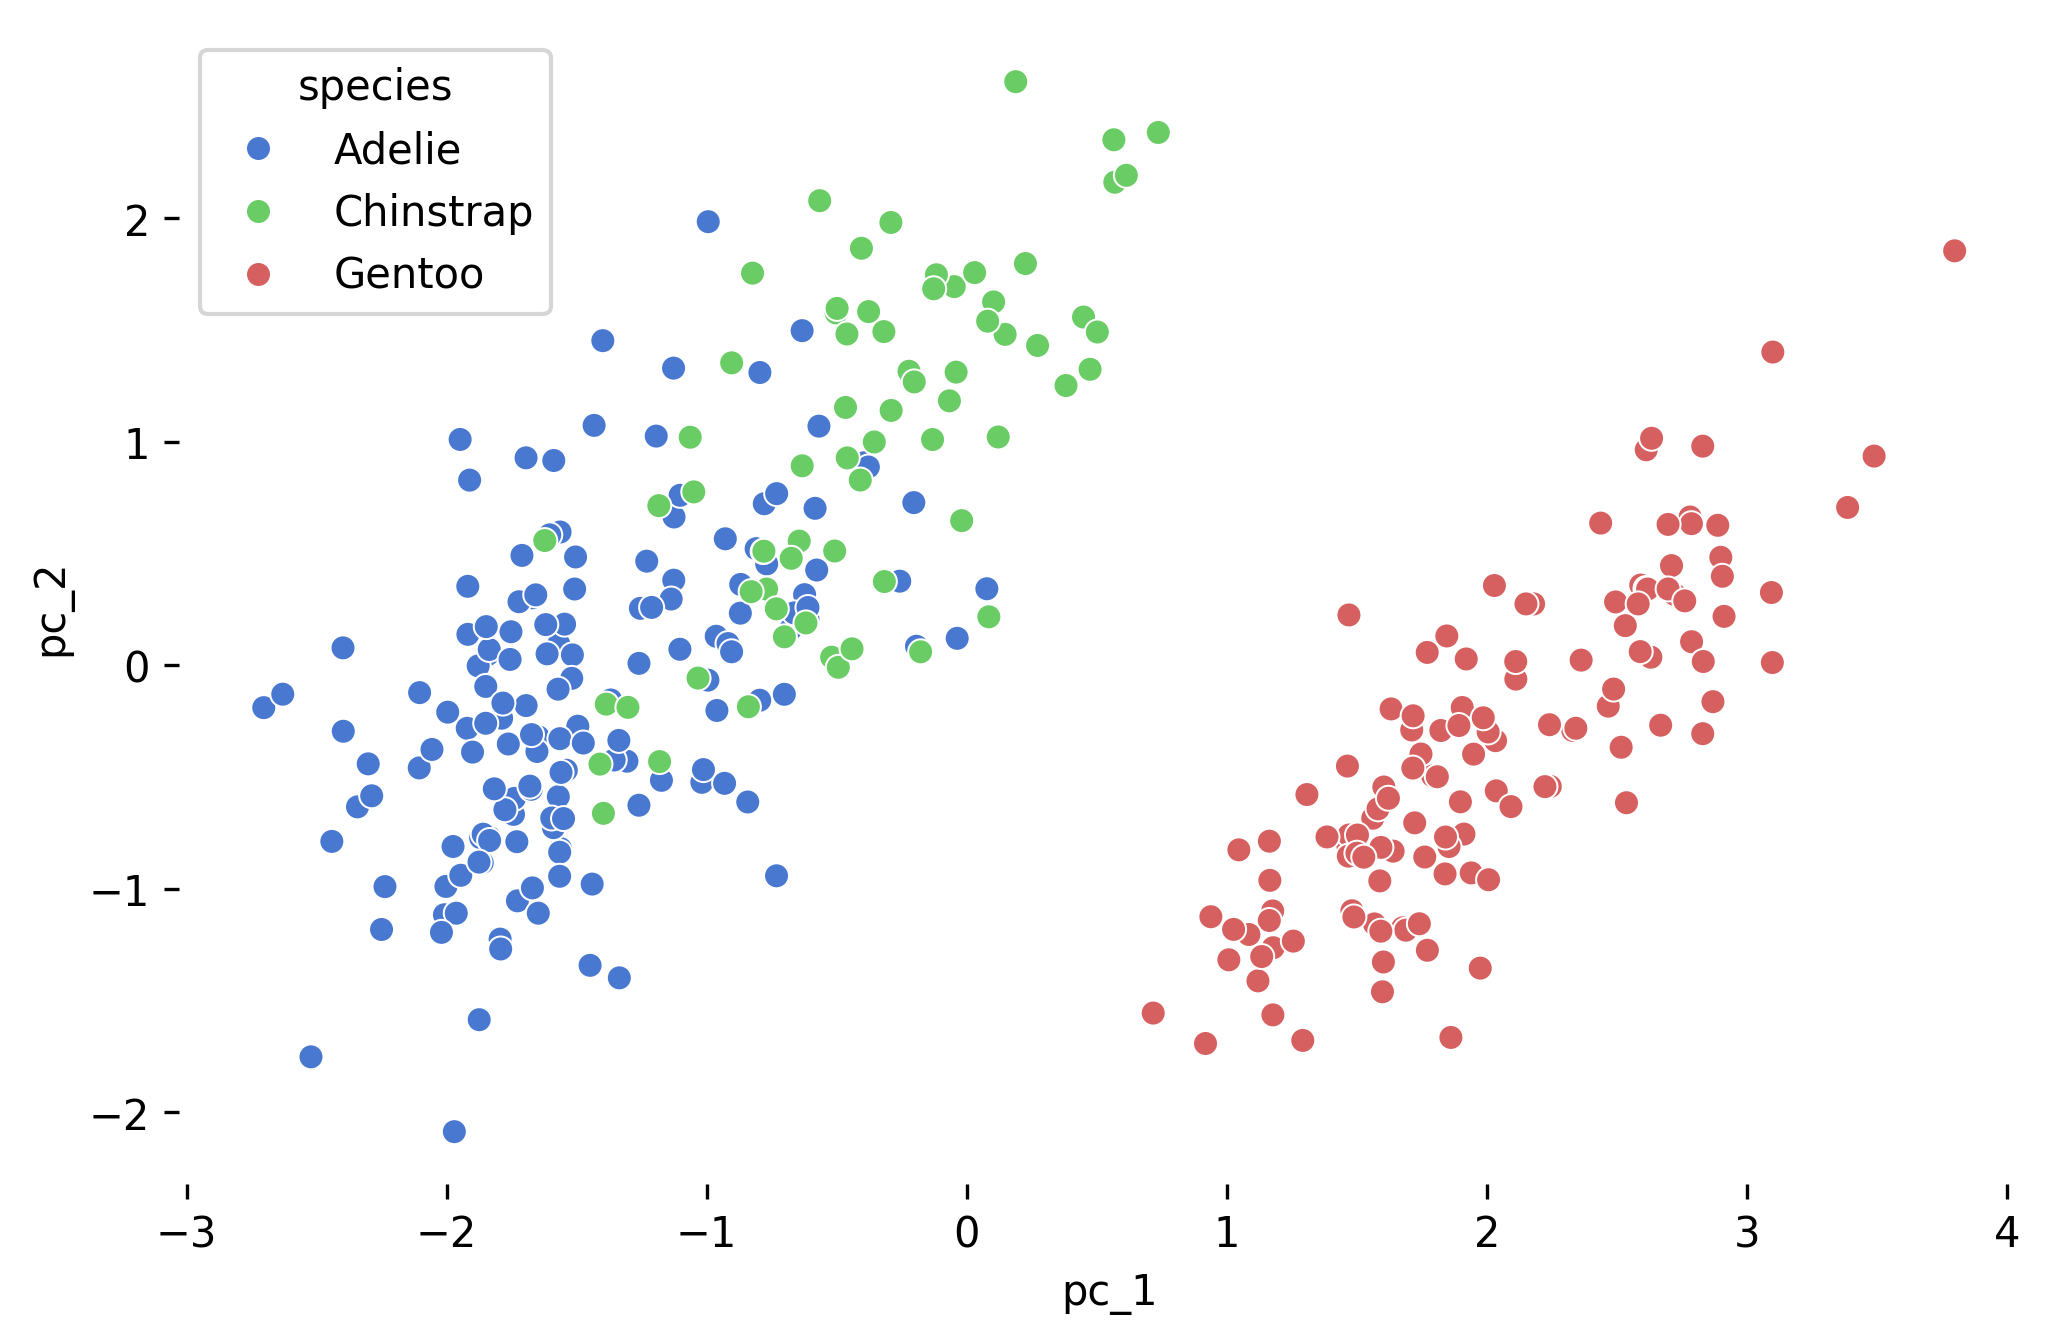

In [7]:
df_ = df.join(pd.DataFrame(components, index = df.index,
                           columns = ['pc_1', 'pc_2']))

fig, ax = plt.subplots(figsize = (8,5))
ax.grid(False)
ax.set_frame_on(False)

sns.scatterplot(data=df_, x='pc_1', y='pc_2', hue='species', ax =ax)
plt.show()

No gráfico acima, foram adicionados componentes principais ao dataframe original do pandas e, em, seguida, exibidos. O resultado mostra que, evidentemente, a classe Gentoo é claramente separada do resto, enquanto há alguma sobreposição entre Adelie e Chinstrap, o que indica suas similaridades.

Adicionar mais componentesp rincipais irá ajudar a reter a variância do conjunto de dados, e possivelmente criar um modelo ML classificador baseado nos dados.

### **Etapa 5. t-Distributed Stochastic Neighbor Embedding (t-SNE)**

<CONTINUA AQUI>

https://giannistolios.medium.com/exploring-dimensionality-reduction-with-python-a0d769a8783f

# **Referências**

https://giannistolios.medium.com/exploring-dimensionality-reduction-with-python-a0d769a8783f

https://medium.com/analytics-vidhya/a-complete-guide-on-dimensionality-reduction-62d9698013d2

Verleysen, Michel, and Damien François. “The curse of dimensionality in data mining and time series prediction.” International work-conference on artificial neural networks. Springer Berlin Heidelberg, 2005.

Horst, Allison M., Alison Presmanes Hill, and Kristen B. Gorman. “Palmer Archipelago Penguins Data in the palmerpenguins R Package-An Alternative to Anderson’s Irises.” R Journal 14.1 (2022).